In [13]:
import os
import numpy as np 
import cv2 as cv2
import matplotlib.pyplot as plt

In [14]:
img = cv2.imread('D:\__Study__\CluseterTerm\Combined\\0002AA00162C.jpg')
# img = cv2.resize(img, (500, 500))


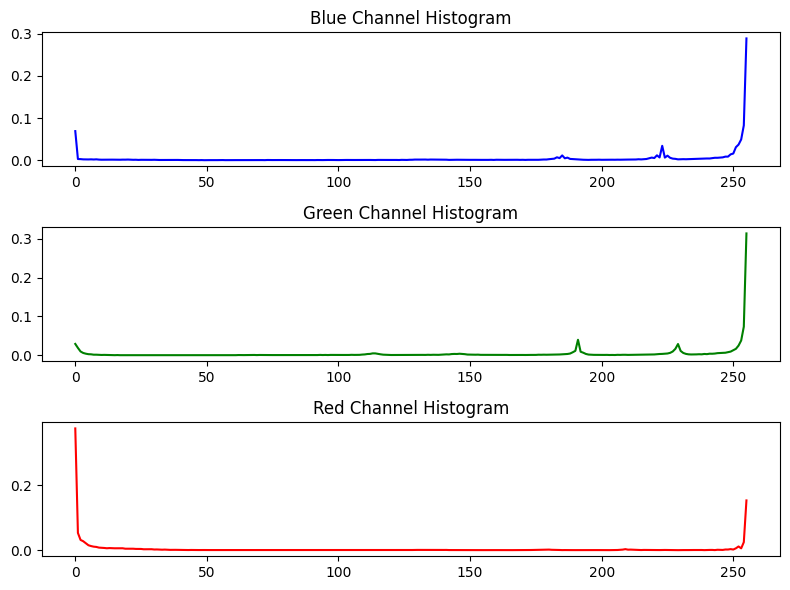

----------------------
Координаты центра 368 138
Радиус 106
Средний градиент по магнитуде 1320.3953179408677
Средний градиент по углу 0.09683578178019048
Дисперсия цвета (BGR) [ 6672.41522006  5784.49411766 11298.81073017]
Средний цвет (BGR) [204.04383232 204.49710751  73.27772339]
Средняя яркость 160.6062210751157


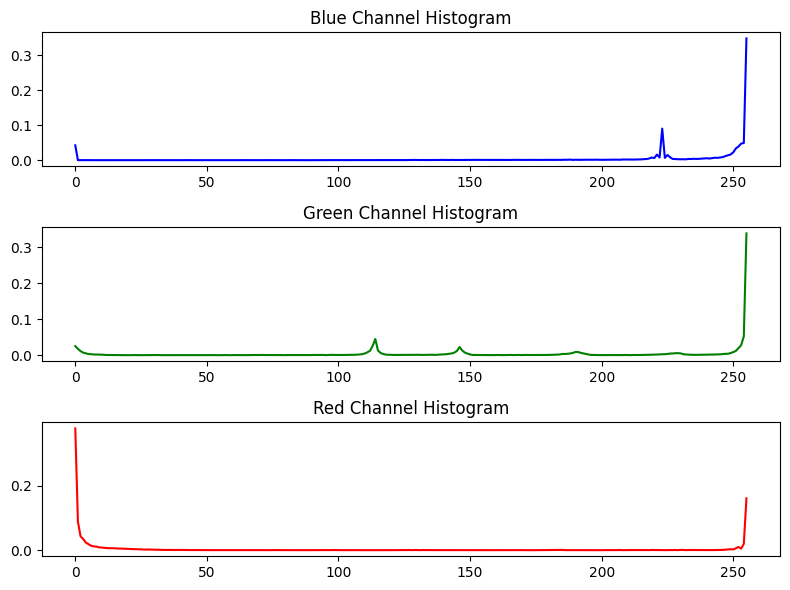

----------------------
Координаты центра 368 402
Радиус 106
Средний градиент по магнитуде 1308.7154937608593
Средний градиент по углу 0.03680403172798241
Дисперсия цвета (BGR) [ 3410.37094079  6684.47130935 11067.77097683]
Средний цвет (BGR) [225.52331791 187.37722499  65.5246084 ]
Средняя яркость 159.4750504331316


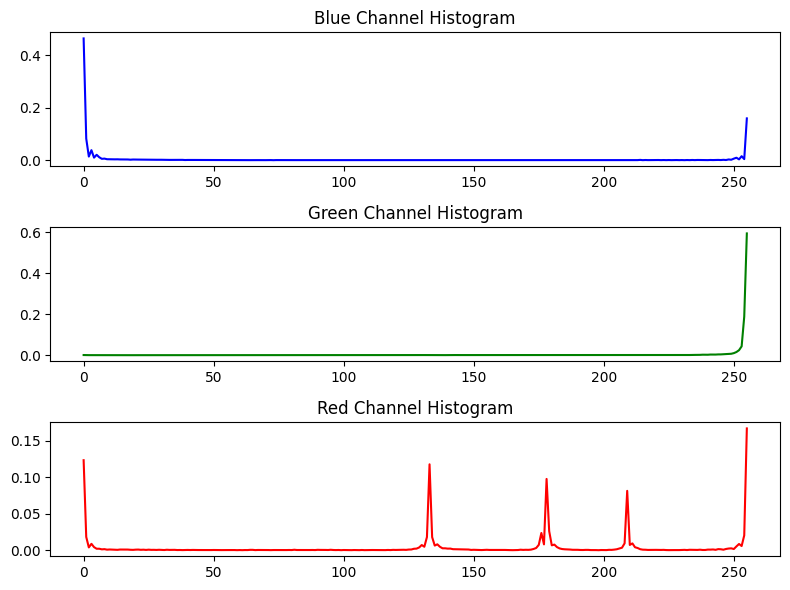

----------------------
Координаты центра 132 402
Радиус 106
Средний градиент по магнитуде 954.659515372968
Средний градиент по углу 0.02462642366231482
Дисперсия цвета (BGR) [10989.07775879   999.4247525   7301.89355676]
Средний цвет (BGR) [ 65.0756497  246.34356088 154.53889284]
Средняя яркость 155.3193678058621


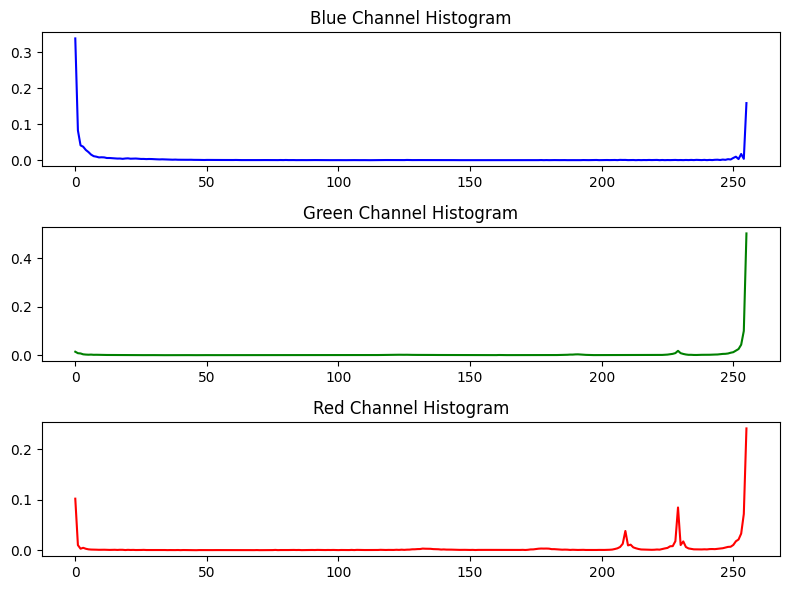

----------------------
Координаты центра 132 138
Радиус 106
Средний градиент по магнитуде 1237.5424702170565
Средний градиент по углу 0.028826917769228563
Дисперсия цвета (BGR) [10875.1982024   4470.7509459   7727.82821066]
Средний цвет (BGR) [ 67.02750089 224.25329299 192.46141865]
Средняя яркость 161.24740417704996


In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Применение размытия для уменьшения шумов
blurred = cv2.medianBlur(gray, 5)

# Применение кругового преобразования Хафа
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=5, minDist=200, param1=50, param2=30, minRadius=70, maxRadius=109)

# Проверка, были ли обнаружены круги
if circles is not None:
    circles = np.round(circles[0, :]).astype(int)
    circle_regions = []
    roi_list = []

    # Обработка каждого обнаруженного круга
    for x, y, r in circles:
        # Нарисовать окружность вокруг круга на исходном изображении
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

        # Выделить область вокруг круга
        circle_roi = img[y - r:y + r, x - r:x + r]
        roi_list.append(circle_roi)
        
        # Вычислить градиенты по x и y направлениям
        gradient_x = cv2.Sobel(circle_roi, cv2.CV_64F, 1, 0, ksize=5)
        gradient_y = cv2.Sobel(circle_roi, cv2.CV_64F, 0, 1, ksize=5)

        # Вычислить магнитуду и угол градиента
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        gradient_angle = np.arctan2(gradient_y, gradient_x)

        # Вычислить средние значения градиента по области
        mean_gradient_magnitude = np.mean(gradient_magnitude)
        mean_gradient_angle = np.mean(gradient_angle)

        # Вычисление среднего цвета (BGR)
        circle_mean_color = np.mean(circle_roi, axis=(0, 1))

        # Вычисление дисперсии цвета (BGR)
        circle_color_variance = np.var(circle_roi, axis=(0, 1))

        # Вычисление гистограммы цвета (BGR)
        histogram_b = cv2.calcHist([circle_roi], [0], None, [256], [0, 256])
        histogram_g = cv2.calcHist([circle_roi], [1], None, [256], [0, 256])
        histogram_r = cv2.calcHist([circle_roi], [2], None, [256], [0, 256])

        # Нормализация гистограмм
        histogram_b /= np.sum(histogram_b)
        histogram_g /= np.sum(histogram_g)
        histogram_r /= np.sum(histogram_r)
        # 7. Средняя яркость
        mean_brightness = np.mean(circle_roi)

        # 8. Максимальное и минимальное значение яркости
        max_brightness = np.max(circle_roi)
        min_brightness = np.min(circle_roi)
        
        
        # Вывести информацию о круге
        print('----------------------')
        print('Координаты центра', x, y)
        print('Радиус', r)
        print('Средний градиент по магнитуде', mean_gradient_magnitude)
        print('Средний градиент по углу', mean_gradient_angle)
        print('Дисперсия цвета (BGR)', circle_color_variance)
        print('Средний цвет (BGR)', circle_mean_color)
        print('Средняя яркость', mean_brightness)
        circle_regions.append({
            'x': x,
            'y': y,
            'radius': r,
            'mean_gradient_magnitude': mean_gradient_magnitude,
            'mean_gradient_angle': mean_gradient_angle,
            'circle_mean_color': circle_mean_color,
            'circle_color_variance': circle_color_variance
        })